# Performance Metrics Clustering-Slihouetter Coefficient

In [1]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np


In [3]:
#Generating the sample data from make_blobs
#this particular setting has onme district cluster and 3 clusters placed close together
x,y = make_blobs(n_samples=500,
                n_features =2,
                centers=4,
                cluster_std =1,
                center_box=(-10.0,10.0),
                shuffle = True,
                random_state =1)    #for reproducibility
range_n_clusters =  [2,3,4,5,6]

In [5]:
x

array([[-6.92324165e+00, -1.06695320e+01],
       [-8.63062033e+00, -7.13940564e+00],
       [-9.63048069e+00, -2.72044935e+00],
       [-2.30647659e+00,  5.30797676e+00],
       [-7.57005366e+00, -3.01446491e+00],
       [-1.00051011e+00,  2.77905153e+00],
       [-4.81826839e+00, -2.77214822e+00],
       [-5.33964799e+00, -1.27625764e+00],
       [-7.94308840e+00, -3.89993901e+00],
       [-5.54924525e+00, -3.41298968e+00],
       [-5.14508990e+00, -9.54492198e+00],
       [-7.09669936e+00, -8.04074036e+00],
       [-5.82641512e+00, -1.96346196e+00],
       [-1.83198811e+00,  3.52863145e+00],
       [-7.34267235e+00, -3.16546482e+00],
       [-7.34072825e+00, -6.92427252e+00],
       [-7.94653906e+00, -3.36768655e+00],
       [-8.24598536e+00, -8.61315821e+00],
       [-1.98197711e+00,  4.02243551e+00],
       [-4.35098035e+00, -3.69476678e+00],
       [-1.04768696e+01, -3.60318139e+00],
       [-1.10195984e+01, -3.15882031e+00],
       [-5.17255904e+00, -4.31835971e+00],
       [-2.

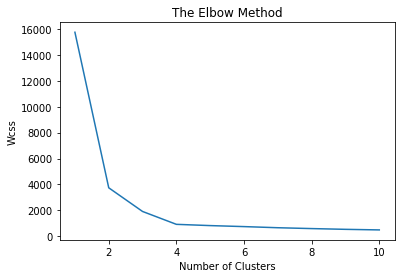

In [6]:
from sklearn.cluster import KMeans

wcss =[]
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init = "k-means++", random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11),wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Wcss")
plt.show()

In [10]:
clusterer =  KMeans(n_clusters= 4, random_state =10)
cluster_labels = clusterer.fit_predict(x)
print(cluster_labels)

[2 2 3 1 0 1 0 0 0 0 2 2 0 1 0 2 0 2 1 0 3 3 0 1 0 0 1 1 3 0 2 1 0 2 0 2 3
 3 2 3 0 3 1 0 0 2 3 0 1 1 1 3 3 0 2 3 3 3 3 0 1 1 3 0 1 0 2 0 3 3 2 3 0 2
 0 0 2 0 0 3 1 1 3 1 1 3 3 1 3 3 1 2 3 0 1 2 2 0 2 1 1 2 1 3 1 0 0 1 1 3 0
 2 1 3 1 3 1 0 1 0 3 2 2 3 0 3 1 2 2 0 1 3 3 3 3 2 1 0 1 1 0 2 0 1 1 1 0 0
 2 2 3 3 1 2 1 3 3 3 3 3 3 3 3 3 1 2 2 2 0 1 2 3 0 2 1 3 3 3 3 2 0 3 1 2 2
 3 0 2 2 0 1 1 2 2 0 1 0 2 2 1 2 3 1 0 0 2 0 3 2 0 3 0 3 2 0 0 0 1 3 1 0 2
 3 0 3 3 3 1 3 1 2 3 2 3 1 1 3 2 1 2 0 3 2 2 2 2 0 3 2 3 0 1 1 0 0 1 3 0 3
 1 0 1 3 3 1 0 2 2 3 3 3 0 1 1 0 1 3 2 1 2 1 2 2 1 2 1 1 0 3 3 3 0 0 3 2 1
 2 2 2 0 3 0 2 3 2 2 3 2 2 3 1 2 0 0 1 1 3 2 1 1 0 2 1 1 0 3 1 3 0 2 2 1 3
 2 0 1 1 0 0 0 2 0 1 1 3 1 1 1 1 2 2 0 1 3 0 2 1 3 1 0 1 3 0 3 1 0 0 2 1 2
 2 2 2 2 2 3 2 1 2 1 1 3 1 0 3 3 2 1 3 1 0 2 3 3 2 3 3 1 1 2 3 0 1 0 0 2 2
 0 2 3 3 2 3 2 3 1 2 1 3 0 1 3 0 1 2 0 1 1 3 0 3 0 2 1 2 0 1 2 2 2 3 1 0 2
 0 0 3 3 2 0 0 0 0 0 0 2 0 3 2 0 1 0 1 0 3 3 1 1 1 3 0 3 2 3 1 0 2 1 2 1 2
 0 1 1 2 3 0 2 3 3 3 2 0 

In [11]:
for n_clusters in range_n_clusters:
    #create a subplot with 1 row 2 columns
    fig, (ax1,ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18,7)
    
    #the 1st subplot is the silhouette plot
    #the silhouette coefficient can range from -1, 1 but in this example all
    #lie with in [-.1,1]
    ax1.set_xlm[-0.1,1]
    #the (n_clusters +1)*10 is for inserting blank space between silhouette
    #plots of individual clustera , to democfrate them clearly.
    ax1.set_ylm([0,len(x) + (n_clusters +1 )* 10])
    
    #initialize the clusterer with n_clusters value and a random generator 
    # seed of 10 for reproducibility.
    cluster =KMeans(n_clusters =n_clusters, random_State =10)
    cluster_labels = clusterer.fit_predict(x)
    
    #the silhouette_Score gives the average value for all sample
    #this gives a perspective in to the density and separation of the formed clusters
    silhouette_avg = silhouette_score(x,cluster_labels)
    print("for n_clusters = ", n_clusters, 
         "The average silhouette_score is : ", silhouette_avg)
    
    #compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(x, cluster_labels)
    
    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        #cluster i , and sort them
        ith cluster silhouette values = \
        sample_silhouette_values[cluster_labels == i]
        
        ith_cluster_silhouette_values.sort()
        
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                         0, ith_cluster_silhouette_values,
                         facecolor = color , edgecolor = color, alpha=0.7,
                         c= colors, edgecolor = "k")
        #labeling the clusters
        centers = clusterer.cluster_centers_
        #Draw white circle at cluster centers
        ax2.scatter(center[:,0], centers[:, 1], marker ="o",
                   c= "white", alpha =1, s=200, edgecolor ="k")
        for i , c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker= "$%d$", % i,alpha=1, s=50, edgecolor ="k")
                
            ax2.set_title("the visualization of the clustered data")
            ax2.set_xlabel("feature space for the 1st feature")
            ax2.set_y_label("Feature space for the 2nd feature")
            
            plt.suptitle(("Silhouette analysis for Kmeans clustering on sample with n_clusters = %d", %n_clusters)
                        fontsize =14 , fontweight = "bold")
            
plt.show()


SyntaxError: invalid syntax (1237758188.py, line 32)